## YULU - HYPOTHESIS TESTING

### Problem Statement

Yulu is micro-mobility service provider which provides unique vehicles like Electric Cycles for daily commute. The Managemnt at Yulu wants to know the significant variables which affects the demand for shared Electric Cycles in Indian market. They also want to understand how well these variables affects the demand for vehicles like Electric Cycles.

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [3]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
# Setting the theme for the plots to be drawn ahead
sns.set_theme(style="whitegrid")

### Importing the Data

In [4]:
df_yulu = pd.read_csv(r"D:\SCALER\Business Case Study\Yulu - Hypothesis Testing (Jan 19, 2023)\Yulu Dataset\bike_sharing.csv")
df_yulu.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

### Checking the Structure and Characteristics of Data

In [5]:
# Checking the shape of data
df_yulu.shape

(10886, 12)

In [6]:
# Checking the info of data
df_yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Here the column 'datetime' should be of datetime type. Also, the columns 'season','holiday','workingday' and 'weather' are of integer type but actually should have been of object data type. Hence we need to convert these features into their relevant data types.

In [7]:
# Converting the existing datatypes of certain features to their relevant datatypes
df_yulu['datetime'] = pd.to_datetime(df_yulu['datetime'])
df_yulu['season'] = df_yulu['season'].astype('object')
df_yulu['holiday'] = df_yulu['holiday'].astype('object')
df_yulu['workingday'] = df_yulu['workingday'].astype('object')
df_yulu['weather'] = df_yulu['weather'].astype('object')

In [8]:
# Again checking the info the data after conversion of certain features to their relevant data types
df_yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [9]:
# Checking the minimum and maximum datetime available in the data
print(f"Starting Date and Time: {df_yulu['datetime'].min()}, Ending Date and time: {df_yulu['datetime'].max()}")

Starting Date and Time: 2011-01-01 00:00:00, Ending Date and time: 2012-12-19 23:00:00


In [10]:
# Unique Seasons available in data
print(f"Unique Seasons available in data: {df_yulu['season'].unique()}")

Unique Seasons available in data: [1 2 3 4]


In [11]:
# Value Counts of different Seasons available in Data
df_yulu['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [12]:
# Unique data available in 'holiday' column
print(f"Unique data in 'holiday' column: {df_yulu['holiday'].unique()}")

Unique data in 'holiday' column: [0 1]


In [13]:
# Value Counts of different data available in 'holiday' column
df_yulu['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [14]:
# Unique data available in 'workingday' column
print(f"Unique data in 'workingday' column: {df_yulu['workingday'].unique()}")

Unique data in 'workingday' column: [0 1]


In [15]:
# value Counts of different data available in 'workingday' column
df_yulu['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [16]:
# Unique data available in 'weather' column
print(f"Unique data available in 'weather' column: {df_yulu['weather'].unique()}")

Unique data available in 'weather' column: [1 2 3 4]


In [17]:
# Value Counts of different data available in 'weather' column
df_yulu['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [18]:
# Checking the minimum and maximum recorded temperatures
print(f"Minimum Recorded Temperature: {df_yulu['temp'].min()}, Maximum Recorded Temperature: {df_yulu['temp'].max()}")

Minimum Recorded Temperature: 0.82, Maximum Recorded Temperature: 41.0


In [19]:
# Checking the minimum and maximum recorded feeling temperatures
print(f"Minimum Recorded Feeling Temperature: {df_yulu['atemp'].min()}, Maximum Recorded Feeling Temperature: {df_yulu['atemp'].max()}")

Minimum Recorded Feeling Temperature: 0.76, Maximum Recorded Feeling Temperature: 45.455


In [20]:
# Checking the minimum and maximum recorded humidity
print(f"Minimum Recorded Humidity: {df_yulu['humidity'].min()}, Maximum Recorded Humidity: {df_yulu['humidity'].max()}")

Minimum Recorded Humidity: 0, Maximum Recorded Humidity: 100


In [21]:
# Checking the minimum and maximum recorded windspeed
print(f"Minimum Recorded Windspeed: {df_yulu['windspeed'].min()}, Maximum Recorded Windspeed: {df_yulu['windspeed'].max()}")

Minimum Recorded Windspeed: 0.0, Maximum Recorded Windspeed: 56.9969


In [22]:
# Checking the minimum and maximum number of casual users
print(f"Minimum no. of casual Users: {df_yulu['casual'].min()}, Maximum no. of casual Users: {df_yulu['casual'].max()}")

Minimum no. of casual Users: 0, Maximum no. of casual Users: 367


In [23]:
# Checking the minimum and maximum number of registered users
print(f"Minimum no. of registered users: {df_yulu['registered'].min()}, Maximum no. of registered users: {df_yulu['registered'].max()}")

Minimum no. of registered users: 0, Maximum no. of registered users: 886


In [24]:
# Checking the minimum and maximum no. of total rental bikes
print(f"Minimum Rental Bike: {df_yulu['count'].min()}, Maximum Rental Bike: {df_yulu['count'].max()}")

Minimum Rental Bike: 1, Maximum Rental Bike: 977


### Observations/Insights from Initial Analysis

1. The data available in the dataset is from 01-01-2011 to 19-12-2012.
2. There are 4 different seasons available in the dataset namely 1-spring, 2-summer, 3-fall, 4-winter.
3. There is not significant difference in the availability of total count of rental bikes in summer, fall and winter but for spring season it is somewhat less as compared to other seasons.
4. There are a total of 4 different weather patterns available in the dataser namely 1- (Clear, Few clouds, partly cloudy, partly cloudy), 2- (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist), 3- (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds), 4- (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog).
5. Maximum data available in the dataset is for weather pattern 1 while weather pattern for has only 1 data.

### Checking Null Values and Outlier Detection

In [25]:
# Checking the null values available in the dataset
df_yulu.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [26]:
# Checking the statistical description for numerical features
df_yulu.describe()

temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered         count  
count  10886.000000  10886.000000  
mean     155.552177    191.574132  
std      151.039033    181.144454  
min        0.000000      1.000000  
25%       36.000000     42.000000  
50%      118.000000    145.000000  
75%      222.000000    284.000000  
max      886.000000    977.000000

Since there are certain categorical and numerical features available in the dataset, we will construct boxplots for all numerical type features.

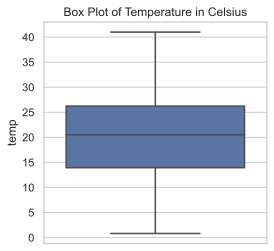

In [27]:
# Boxplot for 'temp' column
fig, ax = plt.subplots(figsize = (4,4))
sns.boxplot(data = df_yulu, y = 'temp', ax = ax).set(title = 'Box Plot of Temperature in Celsius')
plt.show()

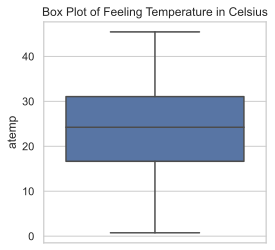

In [28]:
# Boxplot for 'atemp' column
fig, ax = plt.subplots(figsize = (4,4))
sns.boxplot(data = df_yulu, y = 'atemp', ax = ax).set(title = 'Box Plot of Feeling Temperature in Celsius')
plt.show()

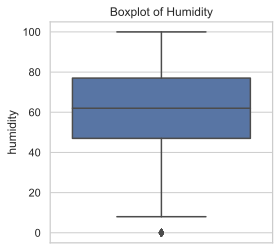

In [29]:
# Boxplot for 'humidity' column
fig, ax = plt.subplots(figsize = (4,4))
sns.boxplot(data = df_yulu, y = 'humidity', ax = ax).set(title = 'Boxplot of Humidity')
plt.show()

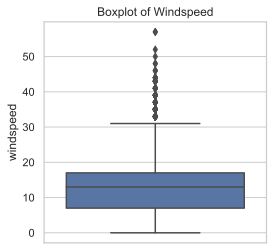

In [30]:
# Boxplot for 'windspeed' column
fig, ax = plt.subplots(figsize = (4,4))
sns.boxplot(data = df_yulu, y = 'windspeed', ax = ax).set(title = 'Boxplot of Windspeed')
plt.show()

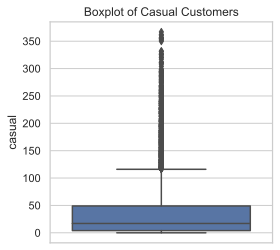

In [31]:
# Boxplot for 'casual' column
fig, ax = plt.subplots(figsize = (4,4))
sns.boxplot(data = df_yulu, y = 'casual', ax = ax).set(title = 'Boxplot of Casual Customers')
plt.show()

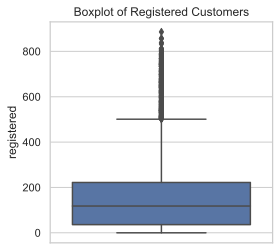

In [32]:
# Boxplot for 'registered' column
fig, ax = plt.subplots(figsize = (4,4))
sns.boxplot(data = df_yulu, y = 'registered', ax = ax).set(title = 'Boxplot of Registered Customers')
plt.show()

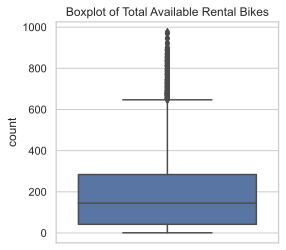

In [33]:
# Boxplot for 'count' column
fig, ax = plt.subplots(figsize = (4,4))
sns.boxplot(data = df_yulu, y = 'count', ax = ax).set(title = 'Boxplot of Total Available Rental Bikes')
plt.show()

### Observations/Insights from the Outlier Detection

1. There are no missing values in our dataset.
2. Checking the statistical difference of the numerical features, we find that the 'casual', 'registered' and 'count' columns have significant DIFFERENCE in their MEAN and MEDIAN values.
3. We find that columns 'temp', 'atemp' have no outliers while column 'humidity' has a couple of potential outliers.
4. We also find that columns 'windspeed', 'casual', 'registered' and 'count' have a large amount of potential outliers.

### Uni-Variate Visual Analysis

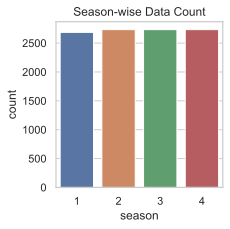

In [34]:
# Plot showing count of data of different seasons
fig, ax = plt.subplots(figsize = (3,3))
sns.countplot(data = df_yulu, x = 'season', ax = ax).set(title = 'Season-wise Data Count')
plt.show()

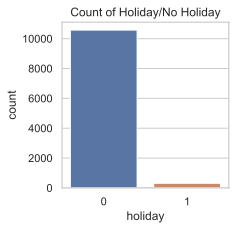

In [35]:
# Plot showing count of data of different holiday
fig, ax = plt.subplots(figsize = (3,3))
sns.countplot(data = df_yulu, x = 'holiday', ax = ax).set(title = 'Count of Holiday/No Holiday')
plt.show()

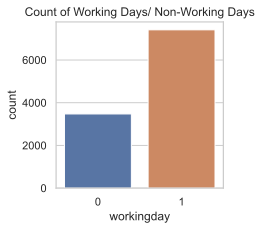

In [36]:
# Plot showing count of data of different working day
fig, ax = plt.subplots(figsize = (3,3))
sns.countplot(data = df_yulu, x = 'workingday', ax = ax).set(title = 'Count of Working Days/ Non-Working Days')
plt.show()

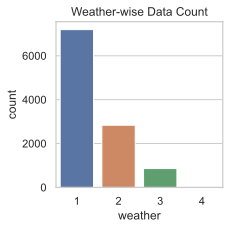

In [37]:
# Plot showing count of data of different weather
fig, ax = plt.subplots(figsize = (3,3))
sns.countplot(data = df_yulu, x = 'weather', ax = ax).set(title = 'Weather-wise Data Count')
plt.show()

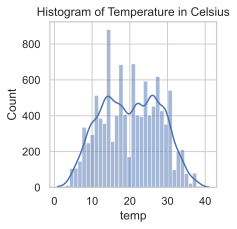

In [38]:
# Plot showing histogram of 'temp'
fig, ax = plt.subplots(figsize = (3,3))
sns.histplot(data = df_yulu, x = 'temp', ax = ax, kde = True).set(title = 'Histogram of Temperature in Celsius')
plt.show()

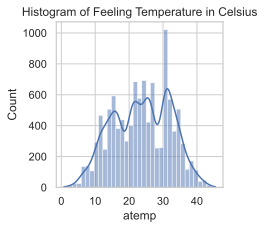

In [39]:
# Plot showing histogram of 'atemp'
fig, ax = plt.subplots(figsize = (3,3))
sns.histplot(data = df_yulu, x = 'atemp', ax = ax, kde = True).set(title = 'Histogram of Feeling Temperature in Celsius')
plt.show()

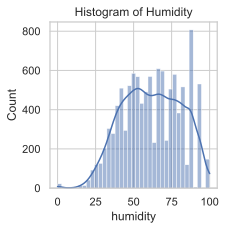

In [40]:
# Plot showing histogram of 'humidity'
fig, ax = plt.subplots(figsize = (3,3))
sns.histplot(data = df_yulu, x = 'humidity', ax = ax, kde = True).set(title = 'Histogram of Humidity')
plt.show()

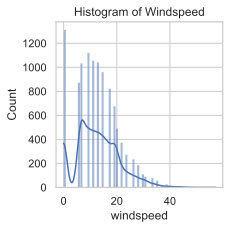

In [41]:
# Plot showing histogram of 'windspeed'
fig, ax = plt.subplots(figsize = (3,3))
sns.histplot(data = df_yulu, x = 'windspeed', ax = ax, kde = True).set(title = 'Histogram of Windspeed')
plt.show()

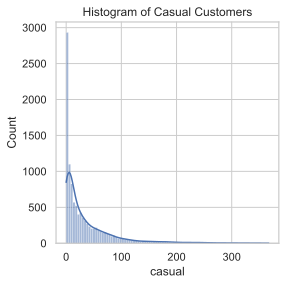

In [42]:
# Plot showing histogram of 'casual'
fig, ax = plt.subplots(figsize = (4,4))
sns.histplot(data = df_yulu, x = 'casual', ax = ax, kde = True).set(title = 'Histogram of Casual Customers')
plt.show()

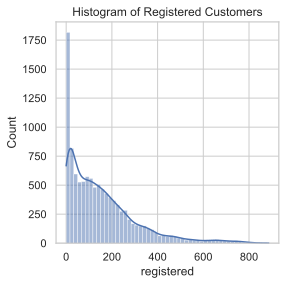

In [43]:
# Plot showing histogram of 'registered'
fig, ax = plt.subplots(figsize = (4,4))
sns.histplot(data = df_yulu, x = 'registered', ax = ax, kde = True).set(title = 'Histogram of Registered Customers')
plt.show()

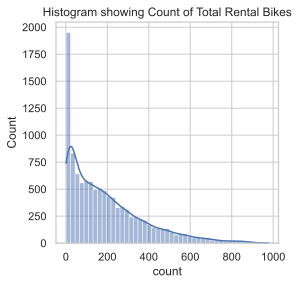

In [44]:
# Plot showing histogram of 'count'
fig, ax = plt.subplots(figsize = (4,4))
sns.histplot(data = df_yulu, x = 'count', ax = ax, kde = True).set(title = 'Histogram showing Count of Total Rental Bikes')
plt.show()

### Outlier Treatment

The data in the 'count' column, when plotted in a histogram along with kde plot, shows that the data is Right-Skewed. To do an appropriate assessment we will do a log transform over it and then see if the data comes to a Gaussian Distribution or not.

In [45]:
df_yulu['log_count'] = np.log(df_yulu['count'])

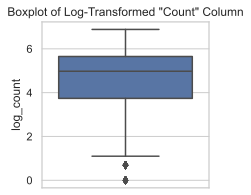

In [46]:
# BoxPlot showing  'log_count' column
fig, ax = plt.subplots(figsize = (3,3))
sns.boxplot(data = df_yulu, y = 'log_count', ax = ax).set(title = 'Boxplot of Log-Transformed "Count" Column')
plt.show()

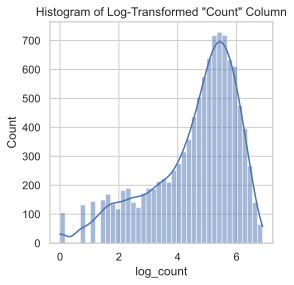

In [47]:
# Plot showing histogram of 'log_count'
fig, ax = plt.subplots(figsize = (4,4))
sns.histplot(data = df_yulu, x = 'log_count', ax = ax, kde = True).set(title = 'Histogram of Log-Transformed "Count" Column')
plt.show()

### Observations/Insights in Outlier Treatment

1. After the 'count' column is log-transformed, the number of outliers has significantly reduced. This favours further analysis as the 'log_count' column can be used instead of original 'count' column available in the dataset.
2. Doing a log transform of the 'count' column DOESN'T CHANGE it's distribution to a completely GAUSSIAN distribution. Although it looks slightly like little bit left-skewed, it is still better than the original distribution of the 'count' column and hence for further analysis we will "ASSUME" it to be a "GAUSSIAN" Distribution and proceed.

In [48]:
# Making a copy of the dataframe so as to do experimenting on the available dataset
yulu_copy = df_yulu.copy(deep = True)
# Creating a 'date' and 'hour' column
yulu_copy['date'] = pd.to_datetime(yulu_copy['datetime']).dt.date
yulu_copy['hour'] = pd.to_datetime(yulu_copy['datetime']).dt.hour
# Creating another column 'hour_timespan' to see if this has any effect on the 
hour_labels = ['00-03','03-06','06-09','09-12','12-15','15-18','18-21','21-24']
hour_points = [0,3,6,9,12,15,18,21,24]
yulu_copy['hour_timespan'] = pd.cut(yulu_copy['hour'], bins = hour_points, labels = hour_labels, include_lowest = True)
# Creating a 'log_count' column in this dataset as well
yulu_copy['log_count'] = np.log(yulu_copy['count'])

### Bi-Variate Visual Analysis 

Since 'count' is the dependent variable here while rest of the variables are independent variable, we will try and analyze the effect of the independent variables on the dependent variable. Also, we have seen that the log transform of the 'count' column is slightly left-skewed but we have assumed it as FAIRLY GAUSSIAN DISTRIBUTION for further analysis. So we will also see the effects of independent variables on the 'log_count' column.

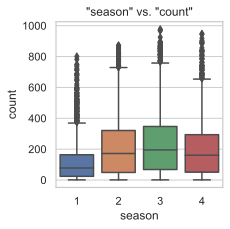

In [49]:
# Plot showing 'season' vs. 'count'
fig, ax = plt.subplots(figsize = (3,3))
sns.boxplot(data = df_yulu, x = 'season', y = 'count', ax = ax).set(title = '"season" vs. "count"')
plt.show()

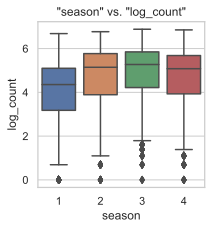

In [50]:
# Plot showing 'season' vs. 'log_count'
fig, ax = plt.subplots(figsize = (3,3))
sns.boxplot(data = df_yulu, x = 'season', y = 'log_count', ax = ax).set(title = '"season" vs. "log_count"')
plt.show()

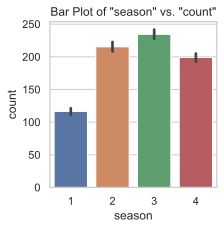

In [51]:
# Bar Plot showing 'season' vs.'count'
fig, ax = plt.subplots(figsize = (3,3))
sns.barplot(data = df_yulu, x = 'season', y = 'count', ax = ax).set(title = 'Bar Plot of "season" vs. "count"')
plt.show()

In [52]:
# Calculating the mean count of total rental bikes available season-wise
df_yulu.groupby('season')['count'].agg('mean')

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

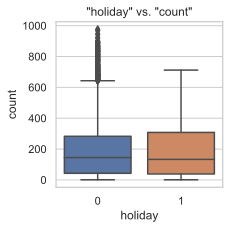

In [53]:
# Plot showing 'holiday' vs. 'count'
fig, ax = plt.subplots(figsize = (3,3))
sns.boxplot(data = df_yulu, x = 'holiday', y = 'count', ax = ax).set(title = '"holiday" vs. "count"')
plt.show()

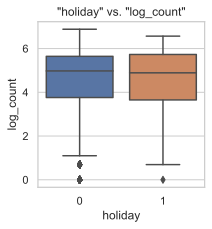

In [54]:
# Plot showing 'holiday' vs. 'log_count'
fig, ax = plt.subplots(figsize = (3,3))
sns.boxplot(data = df_yulu, x = 'holiday', y = 'log_count', ax = ax).set(title = '"holiday" vs. "log_count"')
plt.show()

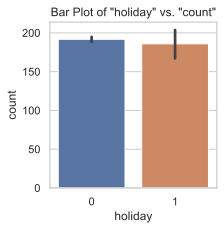

In [55]:
# Bar Plot showing 'holiday' vs.'count'
fig, ax = plt.subplots(figsize = (3,3))
sns.barplot(data = df_yulu, x = 'holiday', y = 'count', ax = ax).set(title = 'Bar Plot of "holiday" vs. "count"')
plt.show()

In [56]:
# Calculating the mean of count of total rental bikes available as per holiday/no holiday
df_yulu.groupby('holiday')['count'].agg('mean')

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

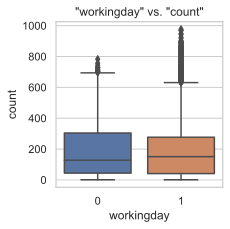

In [57]:
# Plot showing 'workingday' vs. 'count'
fig, ax = plt.subplots(figsize = (3,3))
sns.boxplot(data = df_yulu, x = 'workingday', y = 'count', ax = ax).set(title = '"workingday" vs. "count"')
plt.show()

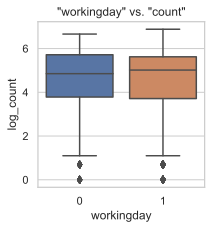

In [58]:
# Plot showing 'workingday' vs. 'log_count'
fig, ax = plt.subplots(figsize = (3,3))
sns.boxplot(data = df_yulu, x = 'workingday', y = 'log_count', ax = ax).set(title = '"workingday" vs. "count"')
plt.show()

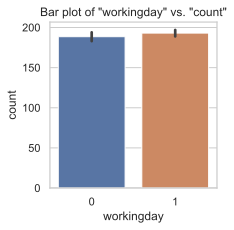

In [59]:
# Bar Plot showing 'workingday' vs.'count'
fig, ax = plt.subplots(figsize = (3,3))
sns.barplot(data = df_yulu, x = 'workingday', y = 'count', ax = ax).set(title = 'Bar plot of "workingday" vs. "count"')
plt.show()

In [60]:
# Calculating the mean of count of total rental bikes available as per working/non-working day
df_yulu.groupby('workingday')['count'].agg('mean')

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

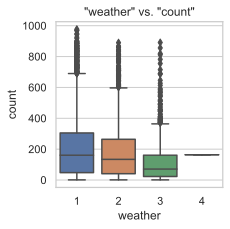

In [61]:
# Plot showing 'weather' vs. 'count'
fig, ax = plt.subplots(figsize = (3,3))
sns.boxplot(data = df_yulu, x = 'weather', y = 'count', ax = ax).set(title = '"weather" vs. "count"')
plt.show()

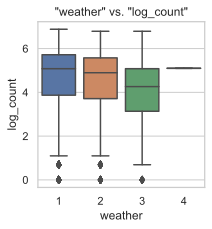

In [62]:
# Plot showing 'weather' vs. 'log_count'
fig, ax = plt.subplots(figsize = (3,3))
sns.boxplot(data = df_yulu, x = 'weather', y = 'log_count', ax = ax).set(title = '"weather" vs. "log_count"')
plt.show()

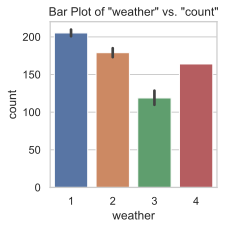

In [63]:
# Bar Plot showing 'weather' vs.'count'
fig, ax = plt.subplots(figsize = (3,3))
sns.barplot(data = df_yulu, x = 'weather', y = 'count', ax = ax).set(title = 'Bar Plot of "weather" vs. "count"')
plt.show()

In [64]:
# Calculating the mean of count of total rental bikes available as per different weather patterns 
df_yulu.groupby('weather')['count'].agg('mean')

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

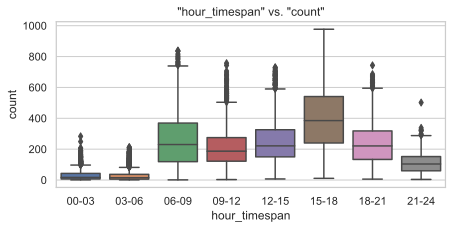

In [65]:
# Plot showing 'hour_timespan' vs. 'count'
fig, ax = plt.subplots(figsize = (7,3))
sns.boxplot(data = yulu_copy, x = 'hour_timespan', y = 'count', ax = ax).set(title = '"hour_timespan" vs. "count"')
plt.show()

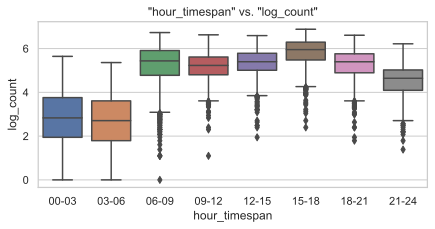

In [66]:
# Plot showing 'hour_timespan' vs. 'log_count'
fig, ax = plt.subplots(figsize = (7,3))
sns.boxplot(data = yulu_copy, x = 'hour_timespan', y = 'log_count', ax = ax).set(title = '"hour_timespan" vs. "log_count"')
plt.show()

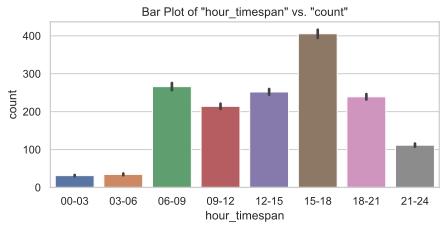

In [67]:
# Bar Plot showing 'hour_timespan' vs.'count'
fig, ax = plt.subplots(figsize = (7,3))
sns.barplot(data = yulu_copy, x = 'hour_timespan', y = 'count', ax = ax).set(title = 'Bar Plot of "hour_timespan" vs. "count"')
plt.show()

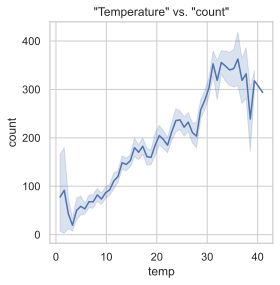

In [68]:
# Plot showing 'temp' vs. 'count'
fig, ax = plt.subplots(figsize = (4,4))
sns.lineplot(data = df_yulu, x = 'temp', y = 'count', ax = ax).set(title = '"Temperature" vs. "count"')
plt.show()

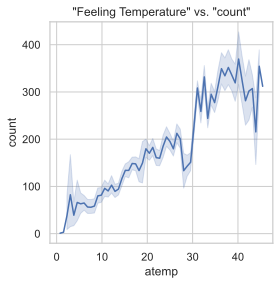

In [69]:
# Plot showing 'atemp' vs. 'count'
fig, ax = plt.subplots(figsize = (4,4))
sns.lineplot(data = df_yulu, x = 'atemp', y = 'count', ax = ax).set(title = '"Feeling Temperature" vs. "count"')
plt.show()

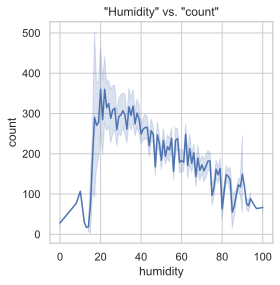

In [70]:
# Plot showing 'humidity' vs. 'count'
fig, ax = plt.subplots(figsize = (4,4))
sns.lineplot(data = df_yulu, x = 'humidity', y = 'count', ax = ax).set(title = '"Humidity" vs. "count"')
plt.show()

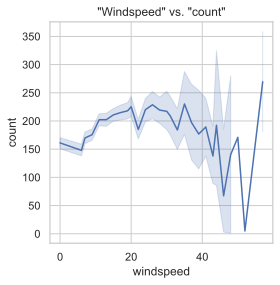

In [71]:
# Plot showing 'windspeed' vs. 'count'
fig, ax = plt.subplots(figsize = (4,4))
sns.lineplot(data = df_yulu, x = 'windspeed', y = 'count', ax = ax).set(title = '"Windspeed" vs. "count"')
plt.show()

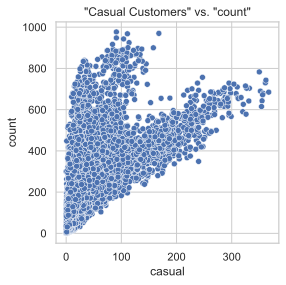

In [72]:
# Plot showing 'casual' vs. 'count'
fig, ax = plt.subplots(figsize = (4,4))
sns.scatterplot(data = df_yulu, x = 'casual', y = 'count', ax = ax).set(title = '"Casual Customers" vs. "count"')
plt.show()

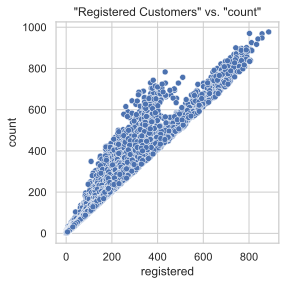

In [73]:
# Plot showing 'registered' vs. 'count'
fig, ax = plt.subplots(figsize = (4,4))
sns.scatterplot(data = df_yulu, x = 'registered', y = 'count', ax = ax).set(title = '"Registered Customers" vs. "count"')
plt.show()

In [74]:
# Checking if the sum of 'casual' and 'registered' is equal to 'count' for all the rows
(df_yulu['casual'] + df_yulu['registered'] == df_yulu['count']).value_counts()

True    10886
dtype: int64

#### Observations/Insights from Visual Analysis

1. The mean count of total rental bikes available is maximum (i.e. 234.42) in season-3 (i.e. Fall) while it is minimum (i.e. 116.34) in season-1 (i.e. Spring).
2. There is not much difference in the mean count of total rental bikes available either there is a holiday or not.
3. There is also not much difference in the mean count of total rental bikes available either on a working or non-working day.
4. The mean count of availability of total rental bikes is maximum (i.e. 205.24) in weather-1 (i.e Clear, Few clouds, partly cloudy, partly cloudy) while it is minimum (i.e. 118.85) in weather-3 (i.e. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds).
5. Maximum count of rental bikes is required between 1500 hrs to 1800 hrs while the least is required between midnight and 0300 hrs.
6. Temperature bears a positive correlation with the count of rental bikes.
7. There is mostly a positive correlation between the Feeling Temperature and the count of rental bikes.
8. There seems a negative correlation between humidity and the count of rental bikes available.
9. There seems a positive correlation between count of casual customers and the count of rental bikes.
10. There definitely seems a positive correlation between the count of registered customers and the count of rental bikes.
11. All the above claims about positive and negative correlation needs to be confirmed using a correlation test further.

### Correlation and Heatmap

In [75]:
# Correlation table showing correlation between different numerical variables
df_yulu.corr()

temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.984948 -0.064949  -0.017852  0.467097    0.318571   
atemp       0.984948  1.000000 -0.043536  -0.057473  0.462067    0.314635   
humidity   -0.064949 -0.043536  1.000000  -0.318607 -0.348187   -0.265458   
windspeed  -0.017852 -0.057473 -0.318607   1.000000  0.092276    0.091052   
casual      0.467097  0.462067 -0.348187   0.092276  1.000000    0.497250   
registered  0.318571  0.314635 -0.265458   0.091052  0.497250    1.000000   
count       0.394454  0.389784 -0.317371   0.101369  0.690414    0.970948   
log_count   0.373913  0.369587 -0.327998   0.120310  0.568500    0.778334   

               count  log_count  
temp        0.394454   0.373913  
atemp       0.389784   0.369587  
humidity   -0.317371  -0.327998  
windspeed   0.101369   0.120310  
casual      0.690414   0.568500  
registered  0.970948   0.778334  
count       1.000000   0.805773  
log_count   0.805773   1.000000

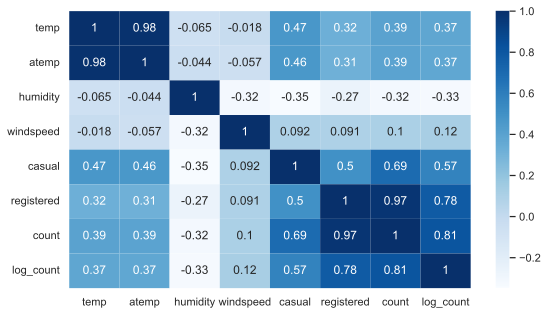

In [76]:
# Heatmap to show the correlation among various numerical features
fig, ax = plt.subplots(figsize = (9,5))
sns.heatmap(df_yulu.corr(), cmap = 'Blues', annot = True, ax = ax)
plt.show()

All the points mentioned in the above observations/insights about the correlation among varous numerical features has been proven correct on the basis of the above heatmap and correlation table.

## Hypothesis Testing

### Hypothesis Test Case 1:

    Null Hypothesis (H0): Working day has no effect on the number of cycles rented.
    Alternate Hypothesis (Ha): Working day has effect on the number of cycles rented.

    Assumed Significance Level (alpha): 0.05
    This means that if p-value is lesser than this significance level, we will REJECT the Null Hypothesis and vice-versa.

As the population mean is not known, we will need to do a T-Test in this case. Here as per the Null Hypothesis, we are trying to see that if the working day and non-working day has the same sample mean or not and does this effect the renting of cycles. Since in the alternate hypothesis we have to prove the means to be unequal which signifies that we have to do a 2-Sample Test. So the test we will choose here is a 2-Sample T-Test.

#### Case-relevant Assumptions of 2-Sample T-Test

1. Data in each group should be NORMALLY Distributed.
2. Data values should be independent.
3. The Variances of the two independent groups should be EQUAL.

Thus we will need to do NORMALITY Test as well as EQUI-VARIANCE Test.

For Normality, we will do SHAPIRO-WILK Test.
For Equi-Variance, we will do LEVENE'S Test.

#### SHAPIRO-WILK'S TEST:
For Shapiro-Test:
        
        Null Hypothesis: Sample follows a normal distribution.
        Alternate Hypothesis: Sample does not follow a normal distribution.

In [77]:
# Shapiro-Wilk Test
test_stat_sh1, p_val_1 = shapiro(df_yulu['count'])
print(f"Test Statistics of Shapiro Test for feature 'count': {test_stat_sh1}, P-value of Shapiro Test for feature 'count': {p_val_1}")
test_stat_sh2, p_val_2 = shapiro(df_yulu['log_count'])
print(f"Test Statistics of Shapiro Test for feature 'log_count': {test_stat_sh2}, P-value of Shapiro Test for feature 'log_count': {p_val_2}")

Test Statistics of Shapiro Test for feature 'count': 0.8783695697784424, P-value of Shapiro Test for feature 'count': 0.0
Test Statistics of Shapiro Test for feature 'log_count': 0.915410578250885, P-value of Shapiro Test for feature 'log_count': 0.0


C:\Users\ashut\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


SHAPIRO-WILK Test shows a p-value of 0.0 in both cases for feature 'count' and when done upon the log-transfformed feature 'log_count' because as per its documentation this test fails for sample size gretaer than 5000. So even if this test is failed, let's assume the sample to be distributed NORMALLY and proceed further.

#### LEVENE'S TEST:
For Levene's Test:
       
       Null Hypothesis: The variance of 'log_count' feature will be equal for different working days.
       Alternate Hypothesis: The variance of 'log_count' feature will not be equal for different working days.

In [78]:
# Since in the documentation of Levene's test, there is no boundation for the length of different groups to be same, hence it is not required to take a sample of these groups.
# Levene Test
wd_grp1 = df_yulu[df_yulu['workingday'] == 0]['log_count']
wd_grp2 = df_yulu[df_yulu['workingday'] == 1]['log_count']
test_stat_lev1, p_val_lev1 = levene(wd_grp1, wd_grp2, center = 'median')
print(f"Levene's Test Statistic for 'log_count' feature: {round(test_stat_lev1,3)}, Levene's P-value for 'log_count' feature: {p_val_lev1}")

Levene's Test Statistic for 'log_count' feature: 8.397, Levene's P-value for 'log_count' feature: 0.003765844443530074


Since the p-value is lesser than the significance level of 0.05, hence we will reject the null hypothesis which means that the different working days available in the data DO NOT HAVE EQUAL Variances. But still for further analysis, we will proceed with our t-test assumptions to be true.

Hence we will proceed to perform the 2-Sample T-Test now.

In [79]:
# 2-Sample T-Test
test_stat_t1, p_val_t1 = ttest_ind(wd_grp1, wd_grp2, alternative = 'two-sided')
print(f"T-Test Statistic: {round(test_stat_t1,3)}, P-value: {p_val_t1}")

T-Test Statistic: 1.891, P-value: 0.05860191030754906


Since the p-value is greater than the significance level of 0.05, we will fail to reject the null hypothesis which means that working day actually has no effect on the renting of number of cycles.

### Hypothesis Test Case 2:

    Null Hypothesis (H0): Number of cycles rented is similar in different seasons.
    Alternate Hypothesis (Ha): Number of cycles rented is not similar in different seasons.

    Assumed Significance Level (alpha): 0.05
    This means that if p-value is lesser than this significance level, we will REJECT the Null Hypothesis and vice-versa.

Here we don't know the population mean as well as we have more than two seasons i.e. 4 seasons in total to make a comparison. Hence the appropriate test in this case would be ANOVA.

#### Case-relevant Assumptions of ANOVA Test

1. Data in each group should be NORMALLY Distributed.
2. Data values should be independent.
3. The Variances of all the different independent groups should be EQUAL.

Thus we will need to do NORMALITY Test as well as EQUI-VARIANCE Test.

For Normality, we will do SHAPIRO-WILK Test.
For Equi-Variance, we will do LEVENE'S Test.

#### SHAPIRO-WILK'S TEST:
For Shapiro-Test:
        
        Null Hypothesis: Sample follows a normal distribution.
        Alternate Hypothesis: Sample does not follow a normal distribution.

In [80]:
# Shapiro-Wilk Test
test_stat_sh1, p_val_1 = shapiro(df_yulu['count'])
print(f"Test Statistics of Shapiro Test for feature 'count': {test_stat_sh1}, P-value of Shapiro Test for feature 'count': {p_val_1}")
test_stat_sh2, p_val_2 = shapiro(df_yulu['log_count'])
print(f"Test Statistics of Shapiro Test for feature 'log_count': {test_stat_sh2}, P-value of Shapiro Test for feature 'log_count': {p_val_2}")

Test Statistics of Shapiro Test for feature 'count': 0.8783695697784424, P-value of Shapiro Test for feature 'count': 0.0
Test Statistics of Shapiro Test for feature 'log_count': 0.915410578250885, P-value of Shapiro Test for feature 'log_count': 0.0


SHAPIRO-WILK Test shows a p-value of 0.0 in both cases for feature 'count' and when done upon the log-transfformed feature 'log_count' because as per its documentation this test fails for sample size gretaer than 5000. So even if this test is failed, let's assume the sample to be distributed NORMALLY and proceed further.

#### LEVENE'S TEST:
For Levene's Test:
       
       Null Hypothesis: The variance of 'log_count' feature will be equal for different seasons.
       Alternate Hypothesis: The variance of 'log_count' feature will not be equal for different seasons. 

In [81]:
# Since in the documentation of Levene's test, there is no boundation for the length of different groups to be same, hence it is not required to take a sample of these groups.
# Levene Test
season_grp1 = df_yulu[df_yulu['season'] == 1]['log_count']
season_grp2 = df_yulu[df_yulu['season'] == 2]['log_count']
season_grp3 = df_yulu[df_yulu['season'] == 3]['log_count']
season_grp4 = df_yulu[df_yulu['season'] == 4]['log_count']
test_stat_lev2, p_val_lev2 = levene(season_grp1, season_grp2, season_grp3, season_grp4, center = 'median')
print(f"Levene's Test Statistic for 'log_count' feature: {round(test_stat_lev2,3)}, Levene's P-value for 'log_count' feature: {p_val_lev2}")

Levene's Test Statistic for 'log_count' feature: 9.641, Levene's P-value for 'log_count' feature: 2.3678125658230693e-06


Since the p-value for the Levene's Test is lesser than the significance level of 0.05, we will reject the null hypothesis. This means that the Variance of 'log_count' feature will actually be different for different seasons. But for further analysis, we will 'ASSUME' that the assumptions for ANOVA test to be true and will proceed for the ANOVA Test.

In [82]:
# ANOVA Test
test_stat_an1, p_val_an1 = f_oneway(season_grp1, season_grp2, season_grp3, season_grp4)
print(f"Test Statistic for Anova: {round(test_stat_an1,3)}, P-value for Anova: {p_val_an1}")

Test Statistic for Anova: 192.448, P-value for Anova: 1.3071364586238867e-121


Here we can clearly see that the p-value for the ANOVA Test is lower than the significance level of 0.05, which means that our Null Hypothesis will be REJECTED. This shows that the number of cycles rented is not similar in different seasons i.e. different Seasons actually AFFECTS the renting of cycles.

### Hypothesis Test Case 3:

    Null Hypothesis (H0): Number of cycles rented is similar in different weather.
    Alternate Hypothesis (Ha): Number of cycles rented is not similar in different weather.

    Assumed Significance Level (alpha): 0.05
    This means that if p-value is lesser than this significance level, we will REJECT the Null Hypothesis and vice-versa.

Here we don't know the population mean as well as we have more than two different weather conditions i.e. 4 different weather patterns in total to make a comparison. Hence the appropriate test in this case would be ANOVA.

#### Case-relevant Assumptions of ANOVA Test

1. Data in each group should be NORMALLY Distributed.
2. Data values should be independent.
3. The Variances of all the different independent groups should be EQUAL.

Thus we will need to do NORMALITY Test as well as EQUI-VARIANCE Test.

For Normality, we will do SHAPIRO-WILK Test.
For Equi-Variance, we will do LEVENE'S Test.

#### SHAPIRO-WILK'S TEST:
For Shapiro-Test:
        
        Null Hypothesis: Sample follows a normal distribution.
        Alternate Hypothesis: Sample does not follow a normal distribution.

In [83]:
# Shapiro-Wilk Test
test_stat_sh1, p_val_1 = shapiro(df_yulu['count'])
print(f"Test Statistics of Shapiro Test for feature 'count': {test_stat_sh1}, P-value of Shapiro Test for feature 'count': {p_val_1}")
test_stat_sh2, p_val_2 = shapiro(df_yulu['log_count'])
print(f"Test Statistics of Shapiro Test for feature 'log_count': {test_stat_sh2}, P-value of Shapiro Test for feature 'log_count': {p_val_2}")

Test Statistics of Shapiro Test for feature 'count': 0.8783695697784424, P-value of Shapiro Test for feature 'count': 0.0
Test Statistics of Shapiro Test for feature 'log_count': 0.915410578250885, P-value of Shapiro Test for feature 'log_count': 0.0


SHAPIRO-WILK Test shows a p-value of 0.0 in both cases for feature 'count' and when done upon the log-transfformed feature 'log_count' because as per its documentation this test fails for sample size gretaer than 5000. So even if this test is failed, let's assume the sample to be distributed NORMALLY and proceed further.

#### LEVENE'S TEST:
For Levene's Test:
       
       Null Hypothesis: The variance of 'log_count' feature will be equal for different weather patterns.
       Alternate Hypothesis: The variance of 'log_count' feature will not be equal for different weather patterns. 

In [84]:
# Since in the documentation of Levene's test, there is no boundation for the length of different groups to be same, hence it is not required to take a sample of these groups.
# Levene Test
weather_grp1 = df_yulu[df_yulu['weather'] == 1]['log_count']
weather_grp2 = df_yulu[df_yulu['weather'] == 2]['log_count']
weather_grp3 = df_yulu[df_yulu['weather'] == 3]['log_count']
weather_grp4 = df_yulu[df_yulu['weather'] == 4]['log_count']
test_stat_lev3, p_val_lev3 = levene(weather_grp1, weather_grp2, weather_grp3, weather_grp4, center = 'median')
print(f"Levene's Test Statistic for 'log_count' feature: {round(test_stat_lev3,3)}, Levene's P-value for 'log_count' feature: {p_val_lev3}")

Levene's Test Statistic for 'log_count' feature: 0.926, Levene's P-value for 'log_count' feature: 0.4270348183543722


Since the p-value is greater than the significance level, we will fail to reject the Null hypothesis here, which means that the Variances for all the different weather patterns is equal. Thus we can finally proceed with our ANOVA Test.

In [85]:
# ANOVA Test
test_stat_an2, p_val_an2 = f_oneway(weather_grp1,weather_grp2,weather_grp3,weather_grp4)
print(f"Test Statistic for Anova: {round(test_stat_an2,3)}, P-value for Anova: {p_val_an2}")

Test Statistic for Anova: 49.879, P-value for Anova: 5.214500121600914e-32


Here we can clearly see that the p-value for the ANOVA Test is lower than the significance level of 0.05, which means that our Null Hypothesis will be REJECTED. This shows that the number of cycles rented is not similar in case of different weather patterns i.e. different Weather patterns actually AFFECTS the renting of cycles.

### Hypothesis Test Case 4:

    Null Hypothesis (H0): Weather is independent of Season.
    Alternate Hypothesis (Ha): Weather is not independent of Season i.e. actually depends on Season .

    Assumed Significance Level (alpha): 0.05
    This means that if p-value is lesser than this significance level, we will REJECT the Null Hypothesis and vice-versa.

Here we have to find association between two CATEGORICAL Variables. Thus, we will perform a CHI-SQUARE Test here. But first we will check for the assumtions of Chi-Square Test.

#### Case-Relevant Assumptions for Chi-Square Test:

1. Both the features/variables are categorical.
2. All the observations are independent.
3. Cells in the Contingency table are Mutually Exclusive.
4. Expected value of cells should be 5 or greater in at least 80 % of the cells and that no cell should have expected value less than 1. 

In [86]:
# Preparing a Contingency Table of Weather and Season
WS_contingency = pd.crosstab(df_yulu['weather'], df_yulu['season'])
print(WS_contingency)

season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0


In [87]:
# Checking the Expected values in Contingency Table of Weather and Season for checking if assumptions are true or not
chi2_contingency(WS_contingency)[3]

array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]])

From the above contingency table we can see that for weather pattern 4, we have observed values to be 1,0,0,0 and also the expected values for certain cells are coming out to be less than 1. So we will ignore the whole row for further analysis from contingency table i.e. for weather pattern 4. 

In [88]:
# New Contingency Table after ignoring the weather pattern 4
WS_contingency = pd.crosstab(df_yulu[df_yulu['weather'] != 4]['weather'], df_yulu['season'])
print(WS_contingency)

season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225


In [89]:
# Chi-Square Test
test_stat_chi2, p_val_chi2, dof_chi2, expec_val_chi2 = chi2_contingency(WS_contingency)
print(f"Chi2 Test Statistic: {round(test_stat_chi2,3)}, P-value for Chi2 Test: {p_val_chi2}")

Chi2 Test Statistic: 46.101, P-value for Chi2 Test: 2.8260014509929403e-08


The p-value of the chi-square test is less than the significance level of 0.05, which means Null hypothesis is REJECTED. This means that Weather is actually DEPENDENT on Season.

### Observations/Insights from Hypothesis Testing

1. When we performed Shapiro-Wilk's Test in Hypothesis Testing Cases 1,2 and 3, we found out that the the test could not tell the results as it could not be performed successfully because the sample size was greater than 5000 and this is the basic assmption for performing Shapiro-Wilk's Test. Thus the Normality could not be tested successfully and we assumed and proceeded with the NORMALITY test fulfilled.
2. When we performed Levene's Test to check the EQUI-Variance, we found out that working and non-working days available in the data do not have equal variances. Similarly, Variances was found to be different for different seasons. but Variances was found to be equal for different weather patterns.
3. Working Day has NO EFFECT on the renting of number of bikes.
4. Different Seasons AFFECTS the renting of bikes.
5. Different Weather patterns AFFECTS the renting of bikes.
6. Weather patterns are actually DEPENDENT on Seasons.

### Recommendations

1. Since Season affects the renting of bikes, more bikes should be made available in Fall Season while for Spring Season, the availability of bikes can be made lesser so as to reduce the extra cost being incurred.
2. As weather patterns also affects the renting of bikes, more bikes should be made available in Clear, Few clouds, partly cloudy, partly cloudy conditions while cost cutting can be done with less availability of bikes in Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds weather patterns.
3. As we have seen that working day does not significantly affect the renting of bikes, so availability of bikes can be made according to other significantly affecting factors like weather patterns and seasons in order to save the extra cost being incurred in arranging the availability of bikes.
4. Certain offers/incentives can be given to customers whether it be registered or casual users who rent the bikes regularly in peak demand hours in order to target the customer retention.
5. Another solution for customer retention can be to provide discounts to frequent service-users in peak demand seasons and this can be suitably apt for registered users.